# Plotly

Sources
- https://plotly.com/python/bubble-charts/
- https://dylancastillo.co/4-ways-to-improve-your-plotly-graphs/

In [1]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('cars_cleaned.csv')

df.head()

,Unnamed: 0,Car,Manufacturer,MPG,Cylinders,Displacement,Horsepower,Weight,WeightCategory,Acceleration,ModelYear,ModelYearAbbr,Origin
0,5,Torino,Ford,17.0,8,302,140,3449,3000,10.5,1970,70,American
1,6,Galaxie 500,Ford,15.0,8,429,198,4341,4000,10.0,1970,70,American
2,21,Corona Mark Ii,Toyota,24.0,4,113,95,2372,2000,15.0,1970,70,Japanese
3,24,Maverick,Ford,21.0,6,200,85,2587,2000,16.0,1970,70,American
4,30,2002,Bmw,26.0,4,121,113,2234,2000,12.5,1970,70,European


In [94]:
fig = px.scatter(
    df,
    x="Weight", 
    y="MPG",
    opacity=0.5,
    size="WeightCategory",
    size_max=12,
    color="Manufacturer",
    hover_name="Car", 
    hover_data={
        'WeightCategory':False,
        'Cylinders':True,
        'Displacement':True,
        'Horsepower':True,
        'Acceleration':True,
        'ModelYear':True
    },
    template = "plotly_dark",
    color_discrete_sequence=px.colors.qualitative.Bold
    # config_displayModeBar=False
)
fig.update_layout(
    title=dict(
        text='Weight vs MPG',
        font=dict(color='gray')
    ),
    legend=dict(
        itemclick="toggle",
        title_font_color='gray',
        font_color='gray'
    ),
    hoverdistance=1 #hover disappears when you move away from the point
)
fig.update_xaxes(
    showspikes=True, 
    spikethickness=1,
    spikedash="solid",
    spikesnap="cursor",
    linecolor="gray",
    tickcolor='gray',
    tickfont_color='gray',
    title_font_color='gray',
    range=[1500, 5250],
    showgrid=False
)
fig.update_yaxes(
    showspikes=True, 
    spikethickness=1,
    spikedash="solid",
    spikesnap="cursor",
    linecolor="gray",
    tickcolor='gray',
    tickfont_color='gray',
    title_font_color='gray',
    range=[5, 50],
    showgrid=False
)
fig.show()

# Seaborn

Sources
- https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

In [125]:
import pandas as pd
import seaborn as sns

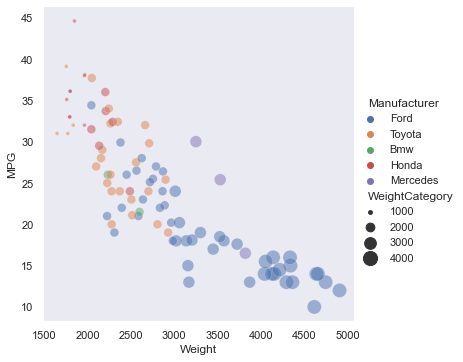

In [126]:
sns.set_theme(style="dark")
sns.set_context("notebook")

sns.relplot(
    x="Weight", 
    y="MPG", 
    hue='Manufacturer', 
    size="WeightCategory", 
    sizes=(15, 200), 
    data=df,
    alpha=0.5
);

# Bokeh

Sources
- https://docs.bokeh.org/en/latest/docs/first_steps/installation.html
- https://stackoverflow.com/questions/43983039/color-points-in-scatter-plot-of-bokeh

In [232]:
import bokeh.models as bmo
from bokeh.plotting import figure, show
from bokeh.io import output_file, curdoc
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.models.tools import HoverTool, CrosshairTool, ResetTool, LassoSelectTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Dark2

In [234]:
# curdoc().theme = 'contrast'
curdoc().theme = 'caliber'

# what you seen when you hover over a point
car_tooltips = [
    ("Car", "@Car"),
    ("Manufacturer", "@Manufacturer"),
    ("Model Year", "@ModelYear"),
    ("Weight", "@Weight"),
    ("MPG", "@MPG"),
    ("Cylinders", "@Cylinders"),
    ("Displacement", "@Displacement"),
    ("Horsepower", "@Horsepower"),
    ("Acceleration", "@Acceleration")
]

# color by manufacturer
cmap = bmo.CategoricalColorMapper(factors=df['Manufacturer'].unique(),
                                   palette=Dark2[5])

# scale the weight categories so the points fit in the plot
weight_categories_scaled = [weight / 125 for weight in df['WeightCategory'].values.tolist()]
df['WeightCategoriesScaled'] = weight_categories_scaled

# Create the figure
fig = figure(
    plot_height=600,
    plot_width=800,
    x_axis_label='Weight',
    y_axis_label='MPG',
    x_range=(1500, 5250),
    y_range=(0, 50),
    title='Weight vs MPG',
    toolbar_location='below',
    tools=[HoverTool(), CrosshairTool(), LassoSelectTool(), ResetTool()],
    tooltips=car_tooltips
)

# get rid of grid lines
fig.xgrid.grid_line_color = None
fig.ygrid.grid_line_color = None

# bubble plot
fig.circle(
    x='Weight',
    y='MPG',
    source=df,
    color={'field': 'Manufacturer', 'transform': cmap},
    size='WeightCategoriesScaled',
    fill_alpha=0.5,
    legend_field="Manufacturer"
)

show(fig)